In [15]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


 # Exploratory Data Analysis (Tweepfake)

In [16]:
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

ABSOLUTE_PATH="/content/drive/My Drive/deepfake_tweets"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [17]:
# Import split dataset
train_set_path, val_set_path, test_set_path = (
    os.path.join(ABSOLUTE_PATH, "data/tweepfake_train.csv"),
    os.path.join(ABSOLUTE_PATH, "data/tweepfake_val.csv"),
    os.path.join(ABSOLUTE_PATH, "data/tweepfake_test.csv")
)

train_df, val_df, test_df = (
    pd.read_csv(train_set_path, sep=";"),
    pd.read_csv(val_set_path, sep=";"),
    pd.read_csv(test_set_path, sep=";")
)

print(f"Train set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Concatenate split sets into a single DataFrame
df = pd.concat([train_df, val_df, test_df], ignore_index=True)
print(f"Combined dataset shape: {df.shape}")


Train set shape: (20712, 4)
Validation set shape: (2302, 4)
Test set shape: (2558, 4)
Combined dataset shape: (25572, 4)


 ## Basic information and statistics

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25572 entries, 0 to 25571
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   screen_name   25572 non-null  object
 1   text          25572 non-null  object
 2   account.type  25572 non-null  object
 3   class_type    25572 non-null  object
 4   clean_text    25572 non-null  object
 5   tweet_length  25572 non-null  int64 
 6   word_count    25572 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [40]:
df.describe()

,tweet_length,word_count
count,25572.000000,25572.000000
mean,110.993860,17.989363
std,77.944337,13.049628
min,5.000000,0.000000
25%,49.000000,7.000000
50%,92.000000,14.000000
75%,155.000000,26.000000
max,2902.000000,64.000000


In [52]:
train_df.describe()

,screen_name,text,account.type,class_type
count,20712,20712,20712,20712
unique,40,20712,2,4
top,kevinhookebot,"""Thead has a generate existing the Sparching f...",human,human
freq,1951,1,10358,10358


In [51]:
val_df.describe()

,screen_name,text,account.type,class_type
count,2302,2302,2302,2302
unique,40,2302,2,4
top,kevinhookebot,"Guys, I hate Facebook. And this Facebook ad ca...",bot,human
freq,217,1,1152,1150


In [50]:
test_df.describe()

,screen_name,text,account.type,class_type
count,2558,2558,2558,2558
unique,40,2558,2,4
top,kevinhooke,@deleonfc6 diamond pearl and platinum were hon...,bot,human
freq,241,1,1280,1278


In [42]:
df.head()

,screen_name,text,account.type,class_type,clean_text,tweet_length,word_count
0,imranyebot,YEA now that note GOOD,bot,others,yea now that note good,22,5
1,zawvrk,Listen to This Charming Man by The Smiths htt...,human,human,listen to this charming man by the smiths,66,8
2,zawarbot,wish i can i would be seeing other hoes on the...,bot,others,wish i can i would be seeing other hoes on the...,57,13
3,ahadsheriffbot,The decade in the significantly easier schedul...,bot,others,the decade in the significantly easier schedul...,63,11
4,kevinhookebot,"""Theim class=\""alignnone size-full wp-image-60...",bot,rnn,theim classalignnone sizefull wpimage src alt...,180,12


In [45]:
df.isnull().sum()

,0
screen_name,0
text,0
account.type,0
class_type,0
clean_text,0
tweet_length,0
word_count,0


## Distribution of class occurrences

### Account type classifications

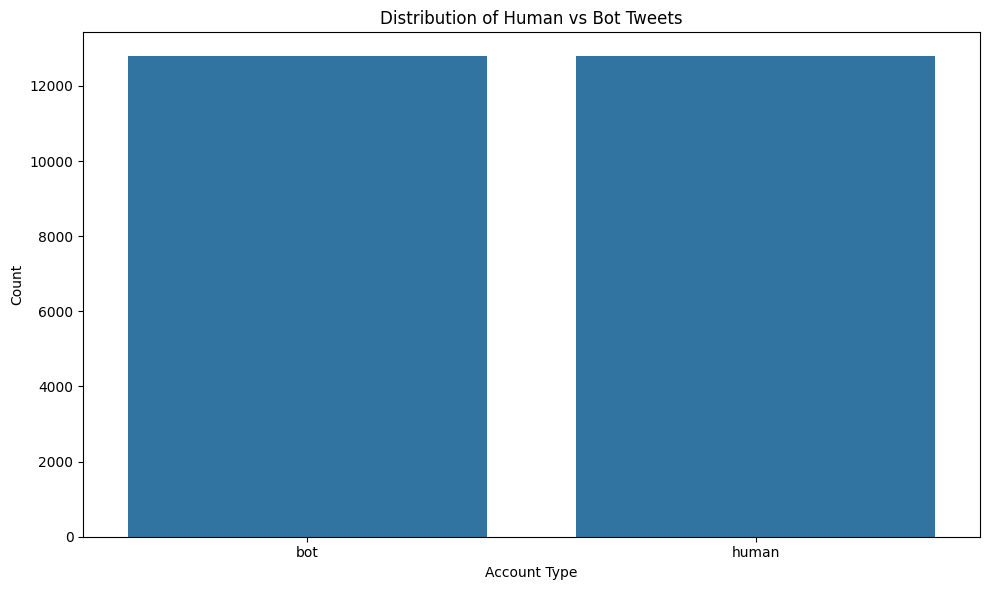

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='account.type', data=df)
plt.title('Distribution of Human vs Bot Tweets')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Tweet classifications

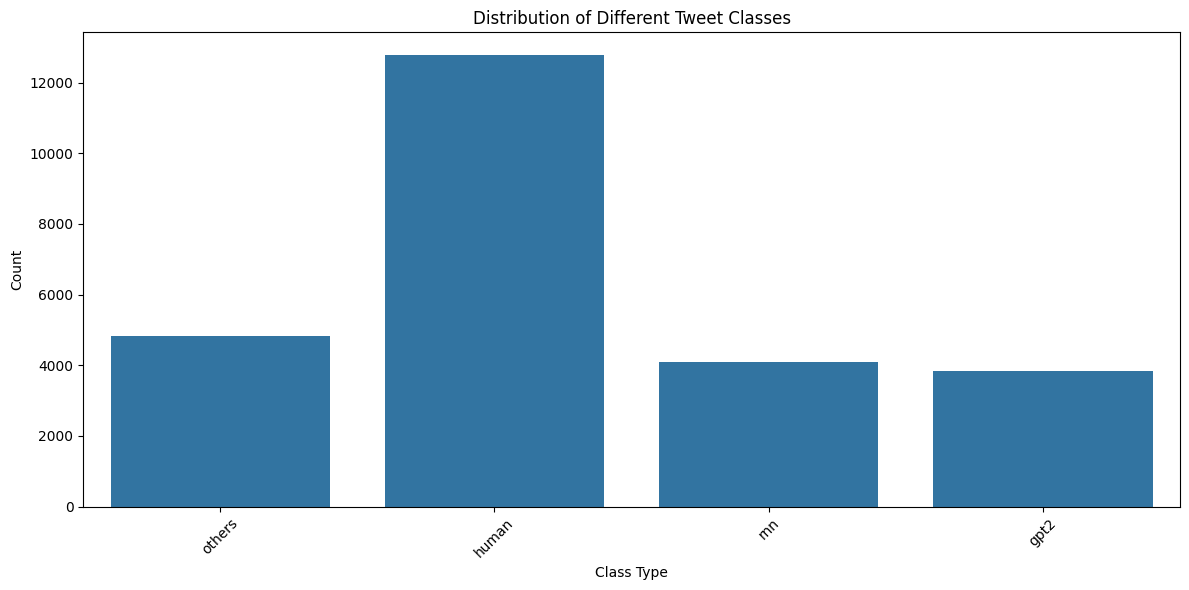

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='class_type', data=df)
plt.title('Distribution of Different Tweet Classes')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Distribution across datasets
print("Distribution in Train set:")
print(train_df['account.type'].value_counts())
print(train_df['class_type'].value_counts())

print("\nDistribution in Validation set:")
print(val_df['account.type'].value_counts())
print(val_df['class_type'].value_counts())

print("\nDistribution in Test set:")
print(test_df['account.type'].value_counts())
print(test_df['class_type'].value_counts())


Distribution in Train set:
account.type
human    10358
bot      10354
Name: count, dtype: int64
class_type
human     10358
others     3920
rnn        3325
gpt2       3109
Name: count, dtype: int64

Distribution in Validation set:
account.type
bot      1152
human    1150
Name: count, dtype: int64
class_type
human     1150
others     436
rnn        370
gpt2       346
Name: count, dtype: int64

Distribution in Test set:
account.type
bot      1280
human    1278
Name: count, dtype: int64
class_type
human     1278
others     484
rnn        412
gpt2       384
Name: count, dtype: int64


 ## Text Analysis

In [23]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        text = re.sub(r'\d+', '', text)  # Remove special numbers
        return text
    return ""

df['clean_text'] = df['text'].apply(clean_text)

### Length of tweet contents

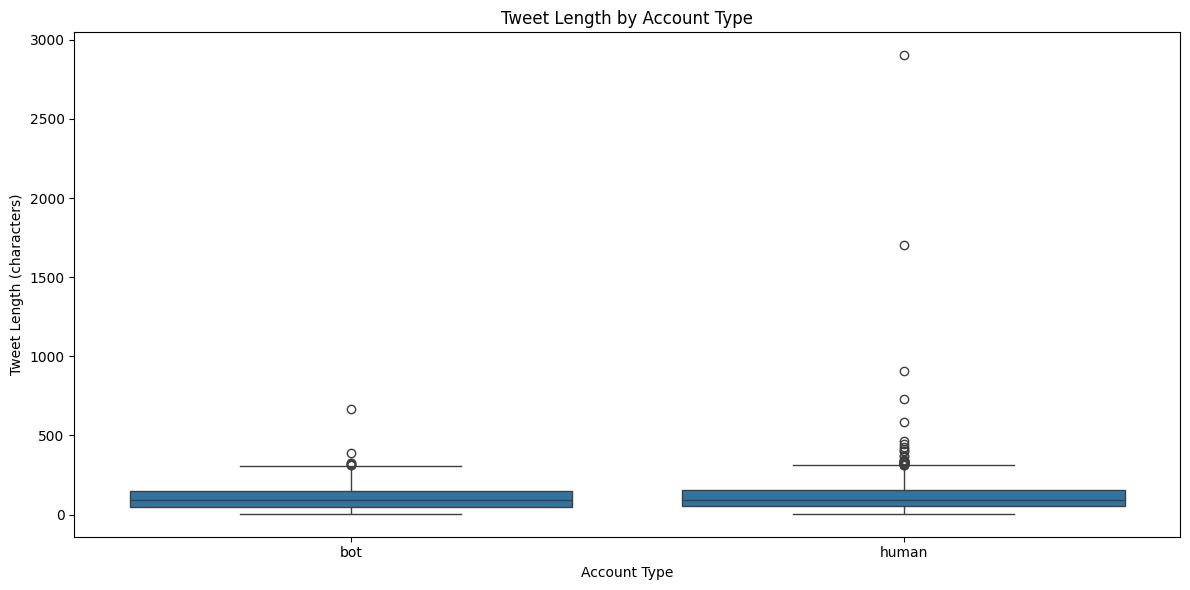

In [24]:
# Tweet length analysis
df['tweet_length'] = df['text'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Comparing tweet length between human and bot
plt.figure(figsize=(12, 6))
sns.boxplot(x='account.type', y='tweet_length', data=df)
plt.title('Tweet Length by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Tweet Length (characters)')
plt.tight_layout()
plt.show()


### Word count between humans and bots

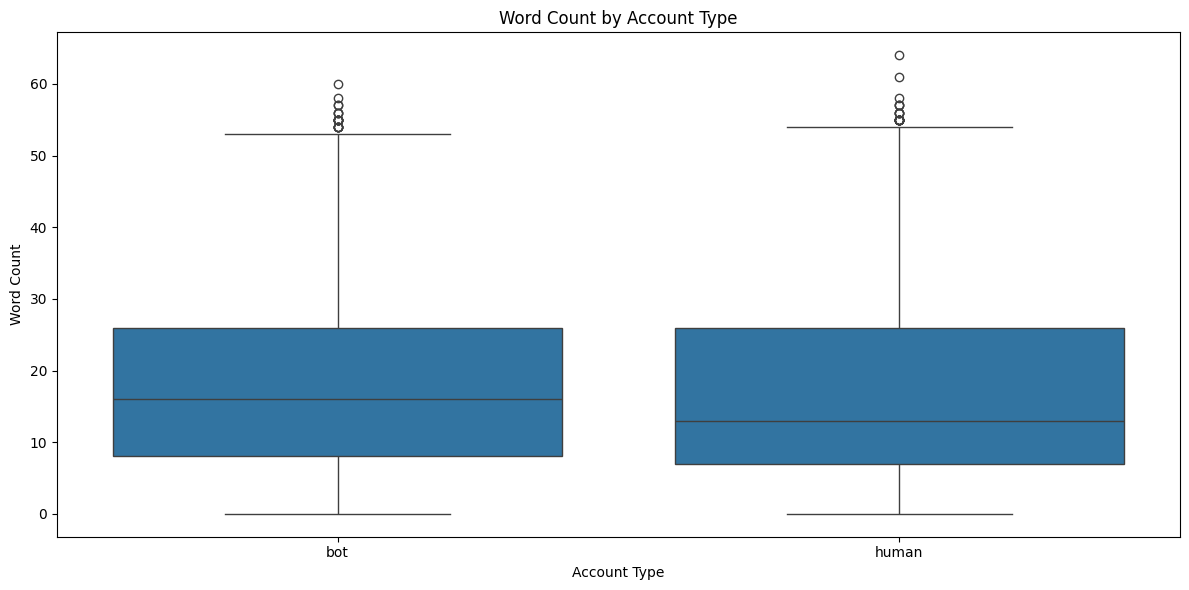

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='account.type', y='word_count', data=df)
plt.title('Word Count by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


### Tweet length and word count by account type

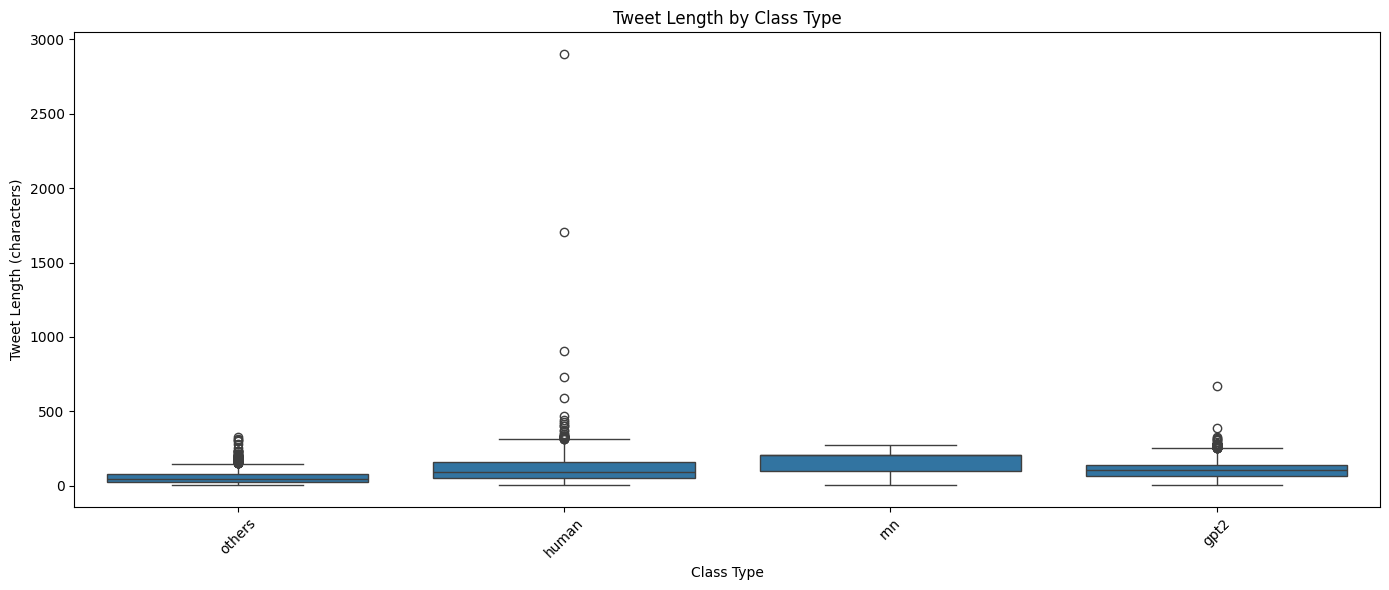

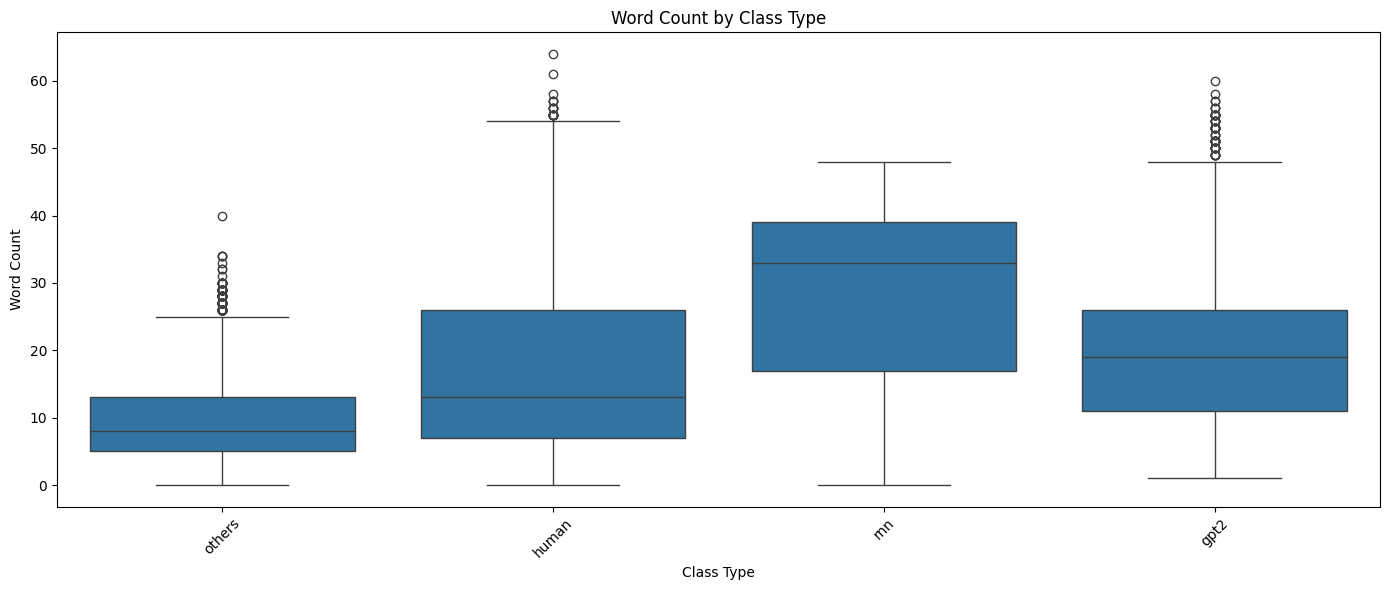

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='class_type', y='tweet_length', data=df)
plt.title('Tweet Length by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Tweet Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='class_type', y='word_count', data=df)
plt.title('Word Count by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ## Frequency of words

In [27]:
def get_most_common_words(text_series, n=20, min_word_length=3):
    stop_words = set(stopwords.words('english'))
    all_words = []

    for text in text_series:
        if isinstance(text, str):
            words = word_tokenize(text)
            filtered_words = [word.lower() for word in words if word.lower() not in stop_words
                             and word.isalpha() and len(word) >= min_word_length]
            all_words.extend(filtered_words)

    return Counter(all_words).most_common(n)


### Most common words in human tweets

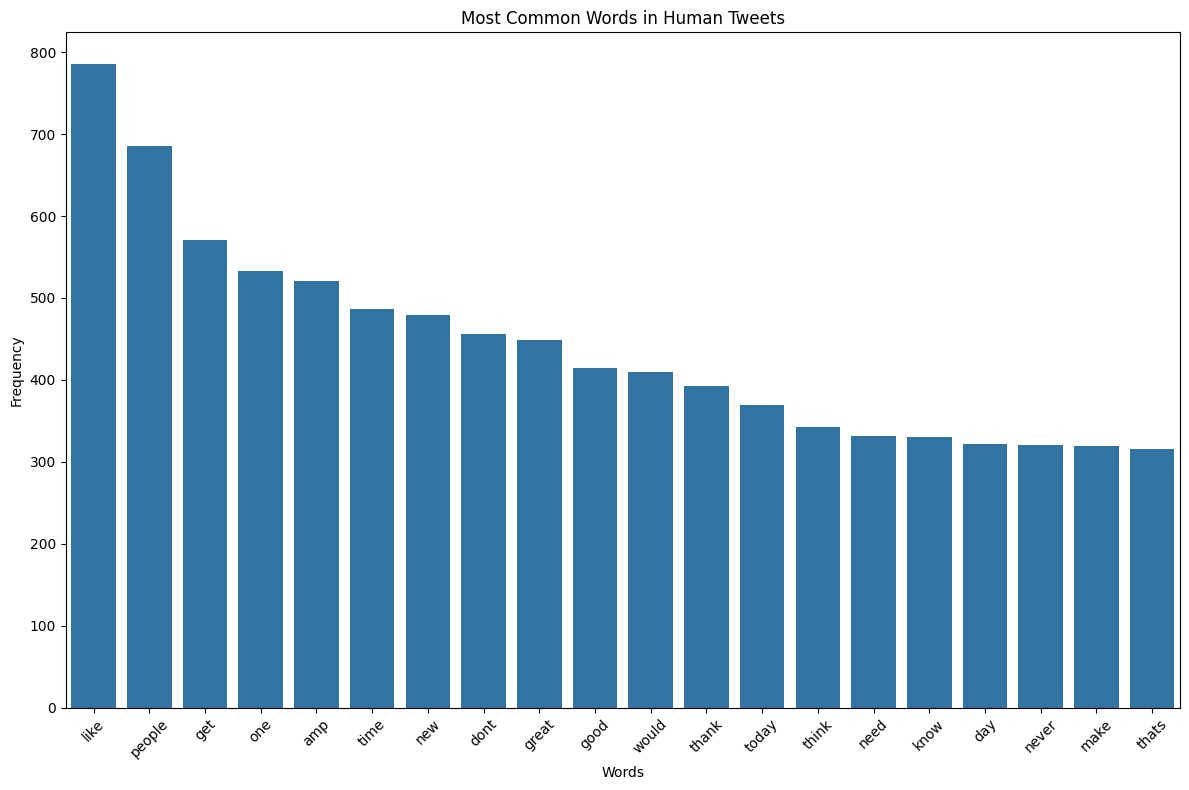

In [28]:
human_tweets = df[df['account.type'] == 'human']['clean_text']
human_common_words = get_most_common_words(human_tweets)

plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in human_common_words],
            y=[word[1] for word in human_common_words])
plt.title('Most Common Words in Human Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Most common words in bot tweets

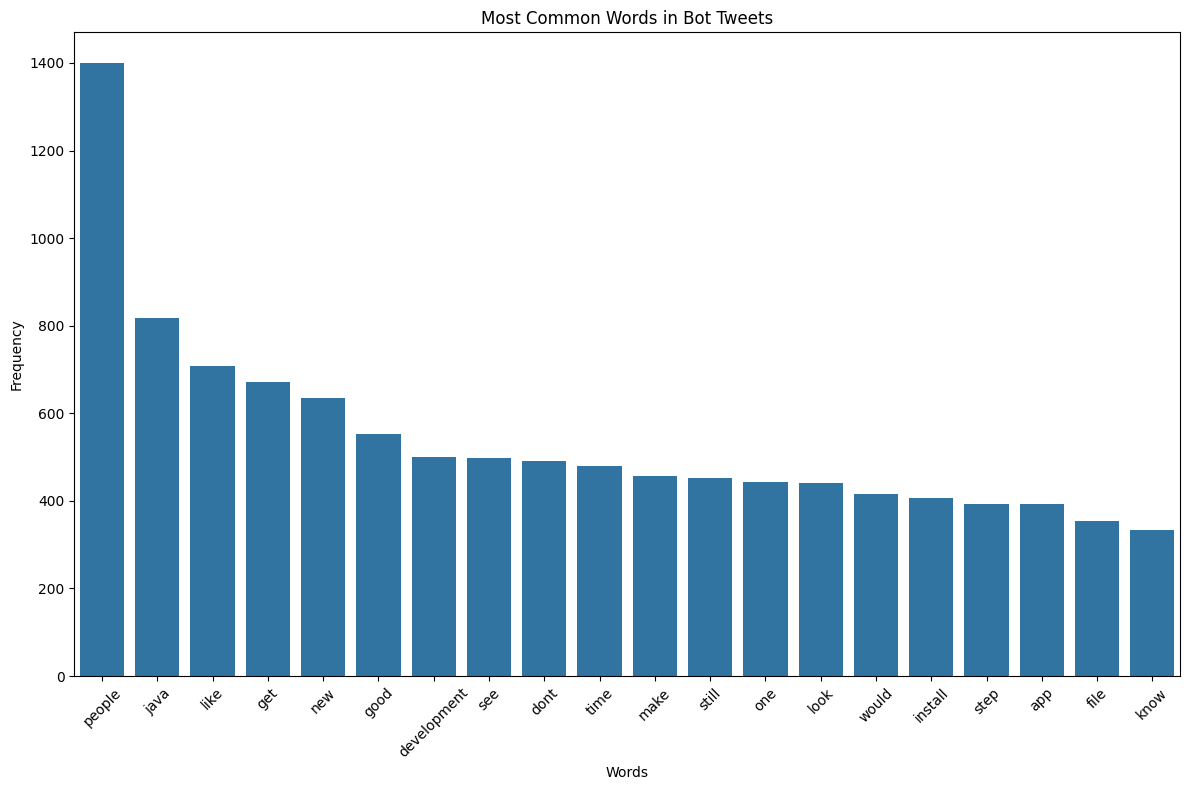

In [29]:
bot_tweets = df[df['account.type'] == 'bot']['clean_text']
bot_common_words = get_most_common_words(bot_tweets)

plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in bot_common_words],
            y=[word[1] for word in bot_common_words])
plt.title('Most Common Words in Bot Tweets')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## Analyzing Different Bot Types

In [30]:
# Get list of unique bot types
bot_types = df[df['account.type'] == 'bot']['class_type'].unique()
print(f"Unique bot types: {bot_types}")

Unique bot types: ['others' 'rnn' 'gpt2']


In [31]:
# Compare tweet characteristics across different bot types
for bot_type in bot_types:
    if bot_type == 'human':
        continue

    bot_type_tweets = df[df['class_type'] == bot_type]['clean_text']
    if len(bot_type_tweets) > 0:
        print(f"\nMost common words in {bot_type} tweets:")
        bot_type_common_words = get_most_common_words(bot_type_tweets, n=10)
        for word, count in bot_type_common_words:
            print(f"{word}: {count}")



Most common words in others tweets:
like: 280
got: 182
get: 172
amp: 153
bro: 149
dont: 147
people: 142
one: 126
good: 118
really: 112

Most common words in rnn tweets:
people: 1001
java: 817
development: 493
install: 405
new: 400
app: 377
step: 375
still: 353
file: 352
look: 329

Most common words in gpt2 tweets:
like: 302
realdonaldtrump: 294
people: 257
dont: 233
good: 222
one: 221
know: 206
get: 196
would: 180
whale: 174


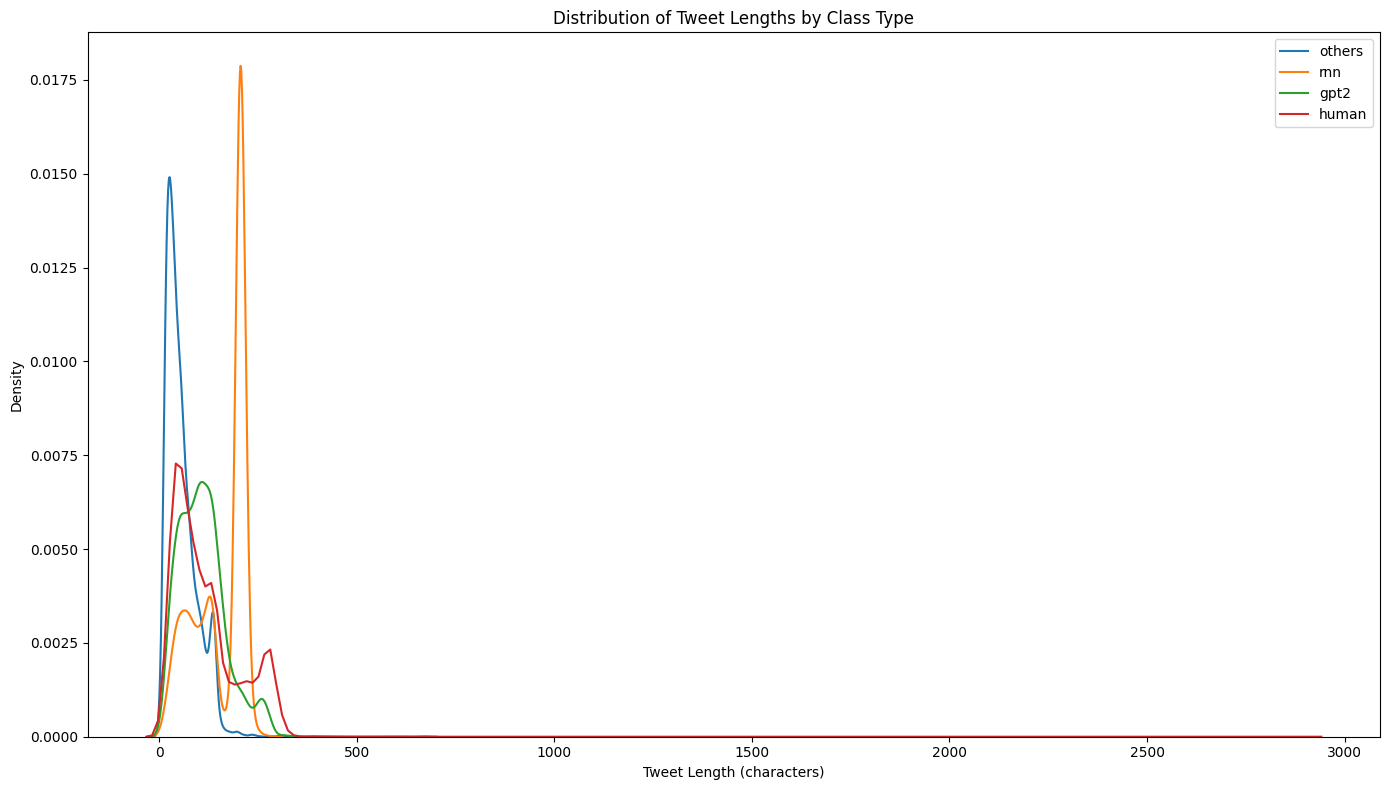

In [32]:
# Comparison of tweet length distributions across bot types
plt.figure(figsize=(14, 8))
for bot_type in bot_types:
    if bot_type == 'human':
        continue

    bot_type_lengths = df[df['class_type'] == bot_type]['tweet_length']
    if len(bot_type_lengths) > 0:
        sns.kdeplot(bot_type_lengths, label=bot_type)

# Add human for comparison
human_lengths = df[df['account.type'] == 'human']['tweet_length']
sns.kdeplot(human_lengths, label='human')

plt.title('Distribution of Tweet Lengths by Class Type')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


 ## N-gram Analysis

In [33]:
# Function to perform n-gram analysis
def get_top_ngrams(text_series, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(text_series.fillna(''))
    ngram_counts = np.sum(X, axis=0)

    ngram_counts = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_counts = sorted(ngram_counts, key=lambda x: x[1], reverse=True)

    return ngram_counts[:top_k]


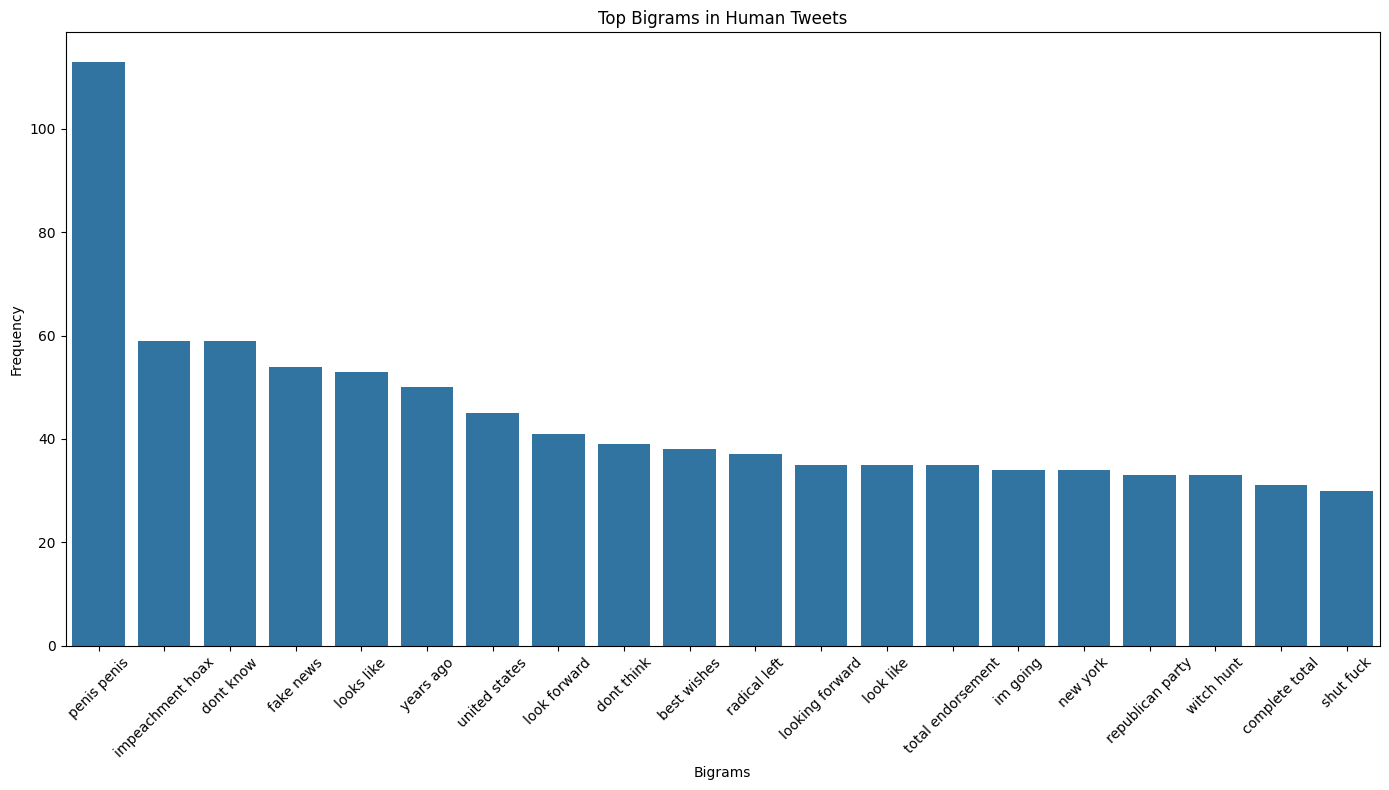

In [34]:
# Bigram analysis for human tweets
human_bigrams = get_top_ngrams(human_tweets)

plt.figure(figsize=(14, 8))
sns.barplot(x=[bigram[0] for bigram in human_bigrams],
            y=[bigram[1] for bigram in human_bigrams])
plt.title('Top Bigrams in Human Tweets')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


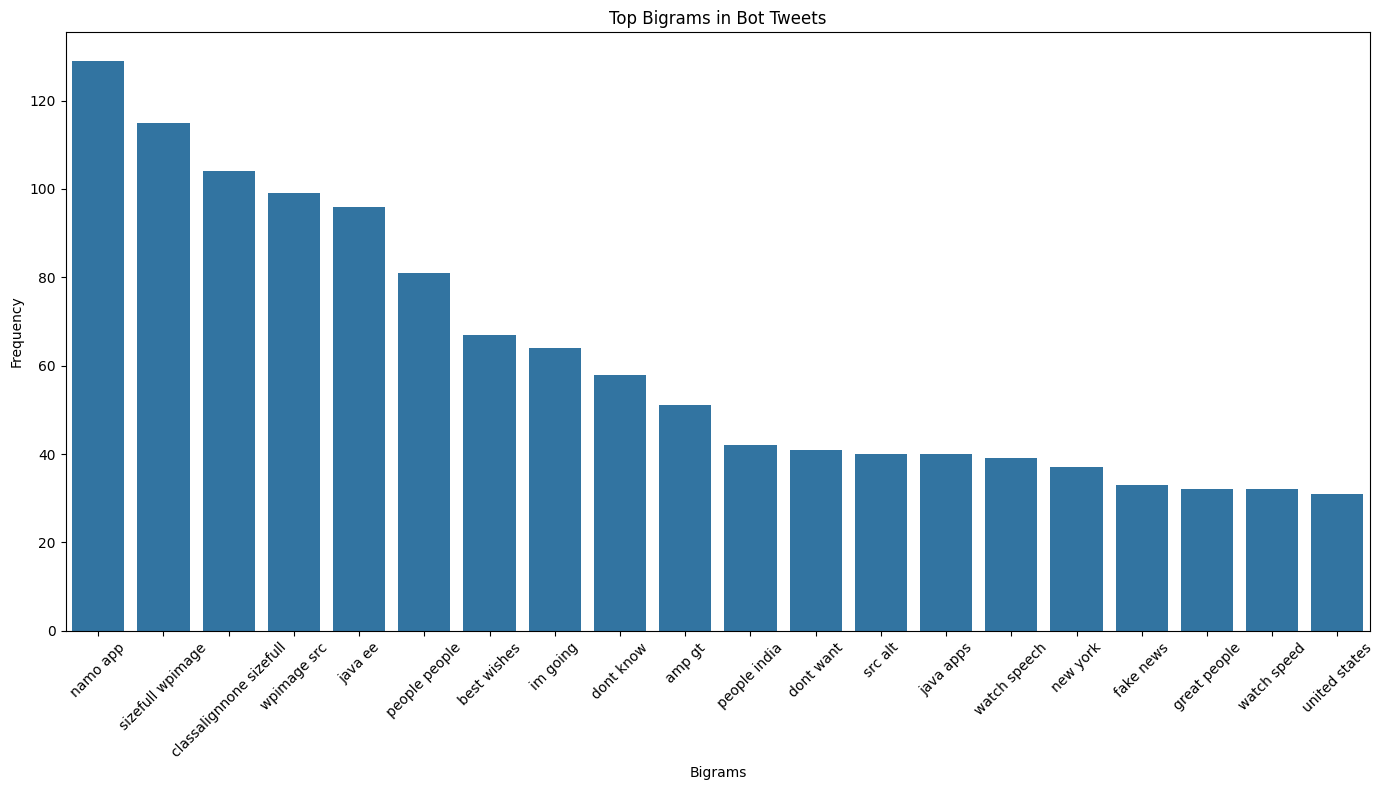

In [35]:
# Bigram analysis for bot tweets
bot_bigrams = get_top_ngrams(bot_tweets)

plt.figure(figsize=(14, 8))
sns.barplot(x=[bigram[0] for bigram in bot_bigrams],
            y=[bigram[1] for bigram in bot_bigrams])
plt.title('Top Bigrams in Bot Tweets')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ## Tweet Authors Analysis

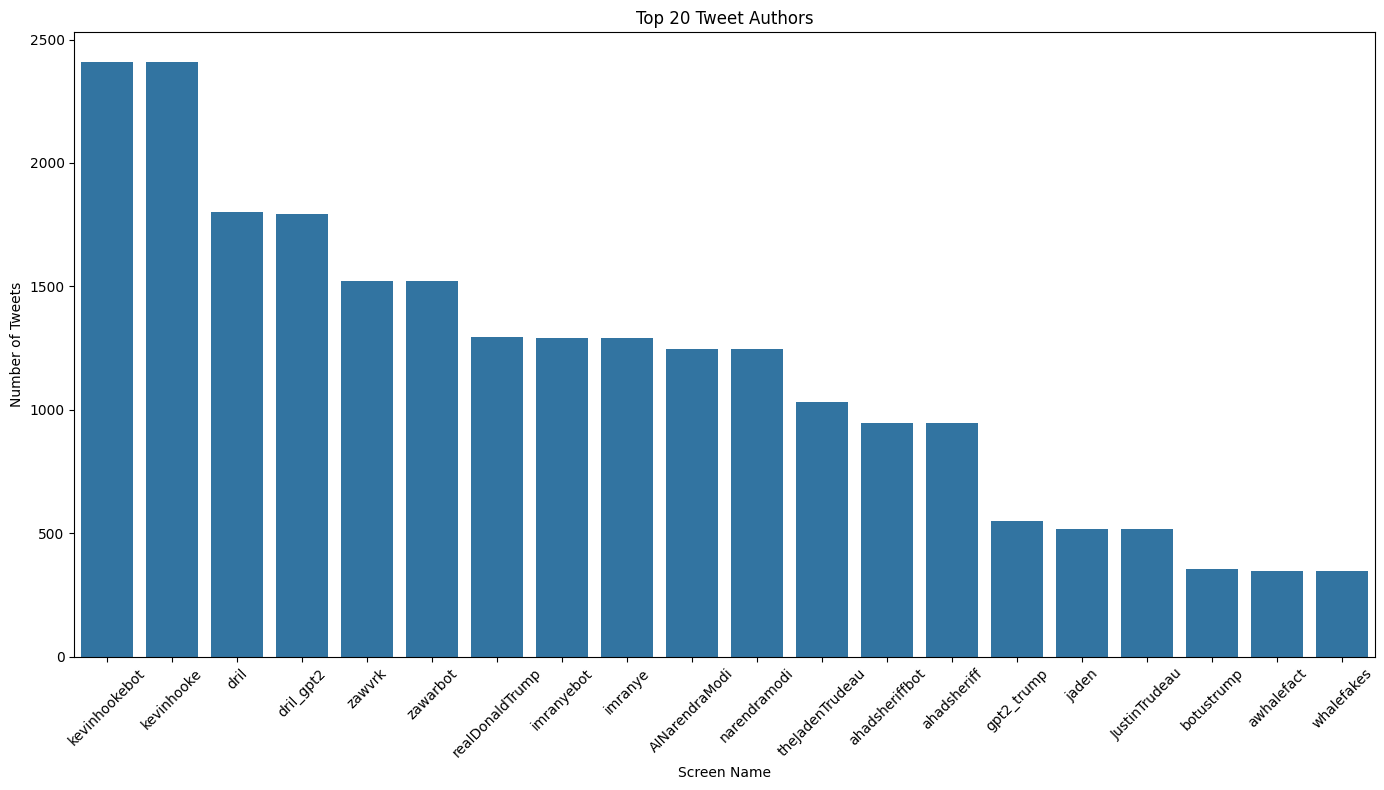

In [36]:
# Distribution of tweets by screen name
top_authors = df['screen_name'].value_counts().head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 20 Tweet Authors')
plt.xlabel('Screen Name')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


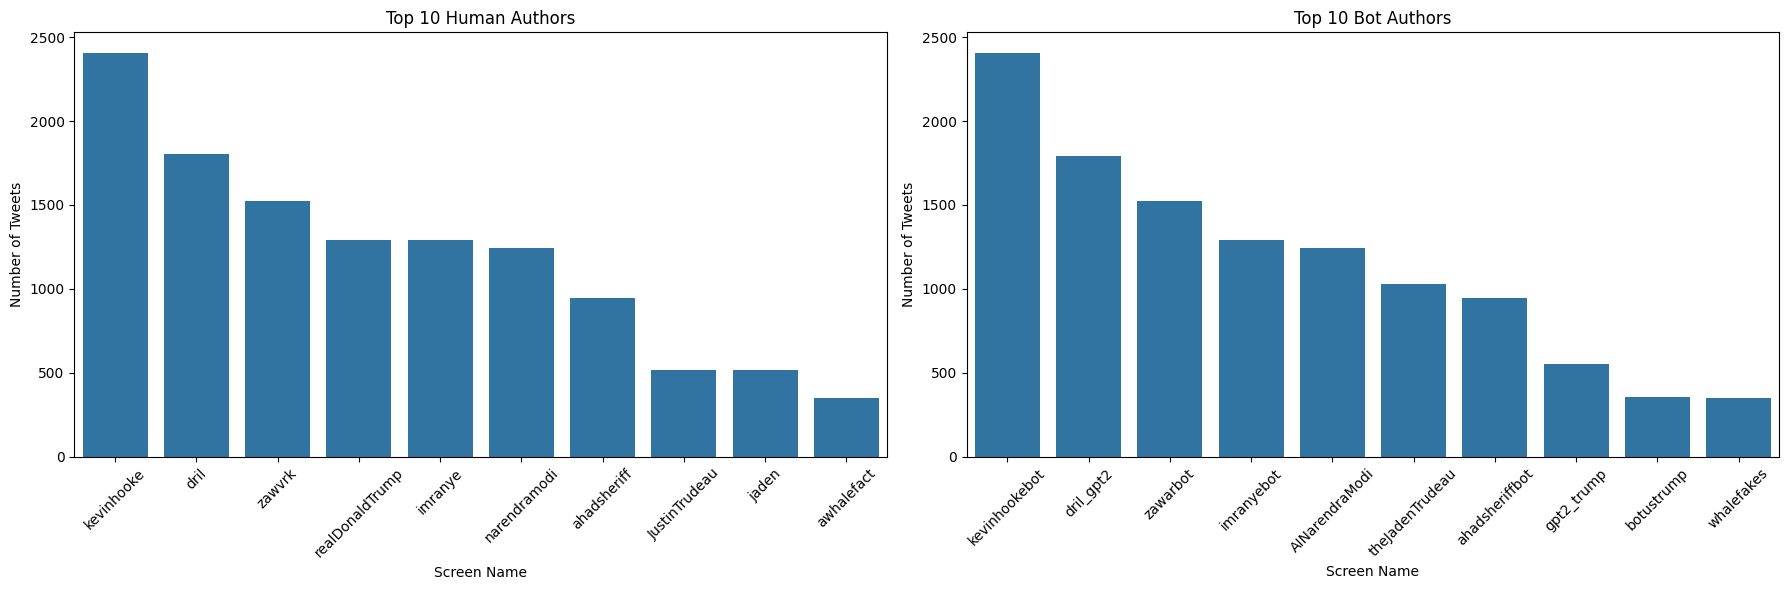

In [37]:
# Analyze top human and bot authors separately
top_human_authors = df[df['account.type'] == 'human']['screen_name'].value_counts().head(10)
top_bot_authors = df[df['account.type'] == 'bot']['screen_name'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_human_authors.index, y=top_human_authors.values, ax=ax1)
ax1.set_title('Top 10 Human Authors')
ax1.set_xlabel('Screen Name')
ax1.set_ylabel('Number of Tweets')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x=top_bot_authors.index, y=top_bot_authors.values, ax=ax2)
ax2.set_title('Top 10 Bot Authors')
ax2.set_xlabel('Screen Name')
ax2.set_ylabel('Number of Tweets')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 ## Summary

In [38]:
print("Summary statistics for tweet length:")
print(df.groupby('account.type')['tweet_length'].describe())

print("\nSummary statistics for word count:")
print(df.groupby('account.type')['word_count'].describe())

print("\nSummary statistics by class type:")
print(df.groupby('class_type')[['tweet_length', 'word_count']].mean())


Summary statistics for tweet length:
                count        mean        std  min   25%   50%    75%     max
account.type                                                                
bot           12786.0  104.478883  68.334161  5.0  45.0  90.0  152.0   668.0
human         12786.0  117.508838  86.003840  6.0  52.0  93.0  157.0  2902.0

Summary statistics for word count:
                count       mean        std  min  25%   50%   75%   max
account.type                                                           
bot           12786.0  18.436884  12.445427  0.0  8.0  16.0  26.0  60.0
human         12786.0  17.541843  13.612849  0.0  7.0  13.0  26.0  64.0

Summary statistics by class type:
            tweet_length  word_count
class_type                          
gpt2          109.240948   19.488148
human         117.508838   17.541843
others         56.585124    9.821901
rnn           156.469199   27.606769


### Class distribution

In [54]:
df['account.type'].value_counts(normalize=True) * 100

,proportion
account.type,
bot,50.0
human,50.0


### Class distribution (account type)

In [53]:
df['class_type'].value_counts(normalize=True) * 100

,proportion
class_type,
human,50.000000
others,18.926951
rnn,16.060535
gpt2,15.012514
